# chapter 3: Basic Principles of Parameter Estimation

# <center> ![picture](pictures/title.jpg)

First, let's start with Maximum Likelihood Estimation (MLE). This method seeks the parameter values that maximize the likelihood function. In other words, it seeks the parameter values that, given a set of observations, will make the observed data most probable.




Maximum Likelihood Estimation `(MLE)` is a method used in statistics to estimate the parameters of a probability distribution. The idea is to find the parameter values that maximize the likelihood function, which is a measure of how likely it is to observe the given data given the parameters.

Mathematically, if we have a set of observations $(x_1, x_2, ..., x_n)$ and a probability distribution $(f(x; \theta))$ with parameters $(\theta)$, the likelihood function is defined as:

$$[L(\theta; x_1, x_2, ..., x_n) = f(x_1; \theta)f(x_2; \theta)...f(x_n; \theta)]$$

The `MLE` of the parameters $(\theta)$ is then the value that maximizes this likelihood function. In other words, it is the value of $(\theta)$ that makes the data most probable.

For a continuous distribution, the `MLE` is often found by taking the log of the likelihood function and differentiating with respect to the parameters, setting the derivative equal to zero, and solving for the parameters.

For a discrete distribution, the `MLE` is found by taking the log of the likelihood function, differentiating with respect to the parameters, setting the derivative equal to zero, and solving for the parameters.

For example, consider a simple case where $(X_1, X_2, ..., X_n)$ are a random sample from a normal distribution with unknown mean $(\mu)$ and variance $(\sigma^2)$. The likelihood function is given by:

$$[L(\mu, \sigma^2; x_1, x_2, ..., x_n) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(x_i - \mu)^2\right)]$$

Taking the log of the likelihood function simplifies the calculation. The MLE of $(\mu)$ and $(\sigma^2)$ are then found by differentiating the log-likelihood function with respect to $(\mu)$ and $(\sigma^2)$, setting the derivatives equal to zero, and solving for the parameters



In Python, we can use the `scipy.optimize` module to find the `MLE` of a parameter. Here's an example of how to do this:

MLE of mu: 4.840039062500008


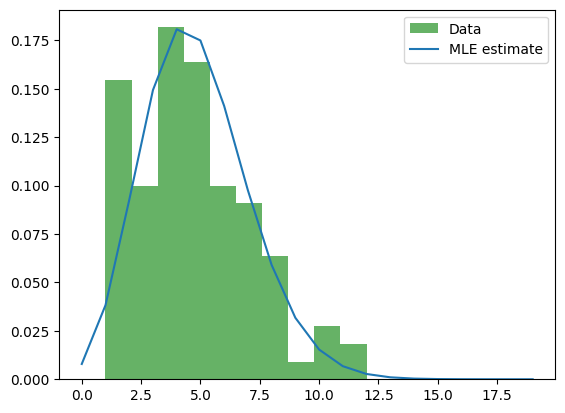

In [5]:
import numpy as np
from scipy.stats import poisson
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
data = poisson.rvs(mu=5, size=100)

# Define the negative log-likelihood function
def neg_log_likelihood(mu):
  return -np.sum(poisson.logpmf(data, mu))

# Use scipy.optimize.minimize to find the MLE
result = minimize(neg_log_likelihood, x0=1, method='nelder-mead')

print(f"MLE of mu: {result.x[0]}")

# Visualize the data and the MLE estimate
plt.hist(data, bins=10, density=True, alpha=0.6, color='g', label='Data')
plt.plot(range(0, 20), poisson.pmf(range(0, 20), result.x[0]), label='MLE estimate')
plt.legend()
plt.show()


In this code, `neg_log_likelihood` is the negative log-likelihood function for a Poisson distribution. We use the `minimize` function from `scipy.optimize` to find the value of `mu` that minimizes this function, which is equivalent to finding the MLE of `mu`.

Next, let's consider Maximum A Posteriori (MAP). This method seeks the parameter values that maximize the posterior distribution of the model given the data. It takes into account both the likelihood of the data given the parameters and the prior distribution of the parameters.



Here's an example of how to find the MAP estimate of a parameter in Python:

MAP of mu: 4.837695312500008


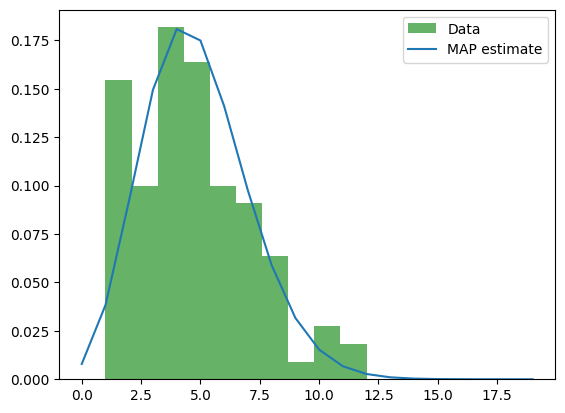

In [6]:
from scipy.stats import norm

# Define the prior distribution
def prior(mu):
  return norm.pdf(mu, loc=0, scale=10)

# Define the likelihood function
def likelihood(mu):
  return np.prod(poisson.pmf(data, mu))

# Define the posterior distribution
def posterior(mu):
  return likelihood(mu) * prior(mu)

# Use scipy.optimize.minimize to find the MAP
result = minimize(lambda mu: -posterior(mu), x0=1, method='nelder-mead')

print(f"MAP of mu: {result.x[0]}")

# Visualize the data and the MAP estimate
plt.hist(data, bins=10, density=True, alpha=0.6, color='g', label='Data')
plt.plot(range(0, 20), poisson.pmf(range(0, 20), result.x[0]), label='MAP estimate')
plt.legend()
plt.show()


In this code, `prior` is the prior distribution of `mu`, and `posterior` is the posterior distribution of `mu` given the data. We use the `minimize` function from `scipy.optimize` to find the value of `mu` that maximizes the posterior distribution, which is equivalent to finding the MAP of `mu`.

Remember that these are just simple examples. In practice, you would likely need to use more complex models and distributions, and you would need to be careful to correctly implement the likelihood and prior functions.

`MLE` is a method of estimating the parameters of a statistical model given some data. The goal of `MLE` is to find the parameter values that maximize the likelihood function, which is a measure of the probability of the observed data given the parameters.

Mathematically, given a set of observations $(x_1, x_2, ..., x_n)$ from a probability distribution $(f(x; \theta))$, where $(\theta)$ represents the parameters of the distribution, the likelihood function is defined as:

$$[L(\theta; x_1, x_2, ..., x_n) = f(x_1; \theta)f(x_2; \theta)...f(x_n; \theta)]$$

The MLE of the parameters $(\theta)$ is the value that maximizes this likelihood function. In other words, it is the value of $(\theta)$ that makes the data most probable.

For a continuous distribution, the MLE is often found by taking the log of the likelihood function (to avoid dealing with products and improve numerical stability) and differentiating with respect to the parameters. The parameters that make the derivative equal to zero are the `MLE`.

For a discrete distribution, the `MLE` is found by taking the log of the likelihood function, differentiating with respect to the parameters, and setting the derivative equal to zero. The parameters that satisfy these conditions are the MLE.

For example, consider a simple case where $(X_1, X_2, ..., X_n)$ are a random sample from a normal distribution with unknown mean $(\mu)$ and variance $(\sigma^2)$. The likelihood function is given by:

$$[L(\mu, \sigma^2; x_1, x_2, ..., x_n) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(x_i - \mu)^2\right)]$$

Taking the log of the likelihood function simplifies the calculation. The MLE of $(\mu)$ and $(\sigma^2)$ are then found by differentiating the `log-likelihood` function with respect to $(\mu)$ and $(\sigma^2)$, setting the derivatives equal to zero, and solving for the parameters

In Python, you can use the `scipy.optimize` module to find the `MLE` of a parameter. Here's an example of how to do this:

In [7]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Generate some data
np.random.seed(0)
data = norm.rvs(loc=5, scale=2, size=100)

# Define the negative log-likelihood function
def neg_log_likelihood(params):
   mu, sigma = params
   return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

# Use scipy.optimize.minimize to find the MLE
result = minimize(neg_log_likelihood, x0=[1, 1], method='nelder-mead')

print(f"MLE of mu: {result.x[0]}, MLE of sigma: {result.x[1]}")


MLE of mu: 5.1196114315210774, MLE of sigma: 2.0157505206727335


In this code, `neg_log_likelihood` is the negative log-likelihood function for a normal distribution. We use the `minimize` function from `scipy.optimize` to find the values of `mu` and `sigma` that minimize this function, which is equivalent to finding the MLE of `mu` and `sigma`

and here is an example of python code with visualization for better understanding:

MLE of mu: 5.1196114315210774, MLE of sigma: 2.0157505206727335


/home/ali/anaconda3/envs/my_learning/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


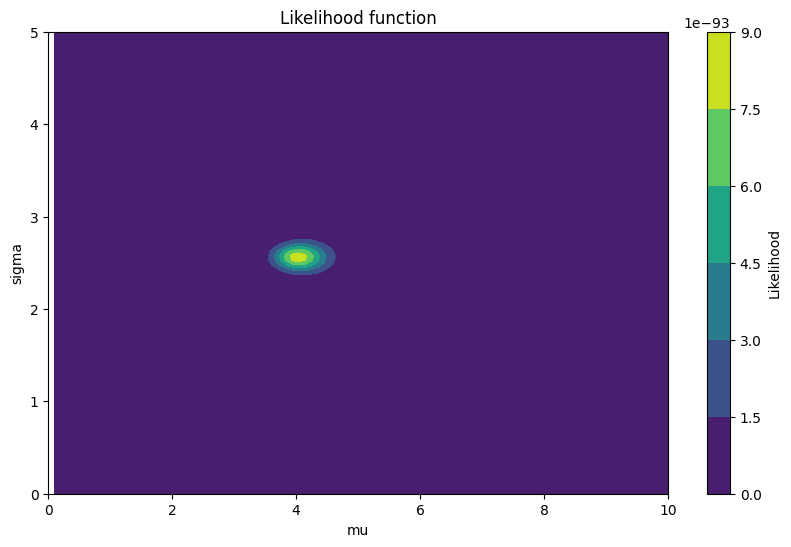

In [8]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
data = norm.rvs(loc=5, scale=2, size=100)

# Define the negative log-likelihood function
def neg_log_likelihood(params):
   mu, sigma = params
   return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

# Use scipy.optimize.minimize to find the MLE
result = minimize(neg_log_likelihood, x0=[1, 1], method='nelder-mead')

print(f"MLE of mu: {result.x[0]}, MLE of sigma: {result.x[1]}")

# Visualize the data and the MLE estimate
mu_range = np.linspace(0, 10, 100)
sigma_range = np.linspace(0, 5, 100)

# Calculate the likelihood for each combination of mu and sigma
likelihood_values = np.zeros((len(mu_range), len(sigma_range)))
for i, mu in enumerate(mu_range):
    for j, sigma in enumerate(sigma_range):
        likelihood_values[i, j] = np.prod(norm.pdf(data, loc=mu, scale=sigma))

# Plot the likelihood values
plt.figure(figsize=(10, 6))
plt.contourf(mu_range, sigma_range, likelihood_values, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.title('Likelihood function')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.show()


In this code, we first generate a dataset from a normal distribution with mean 5 and standard deviation 2. We then define a negative log-likelihood function for a normal distribution, and use the `minimize` function from `scipy.optimize` to find the values of `mu` and sigma that minimize this function, which are the `MLE` of `mu` and `sigma`.

We then plot the likelihood function for a range of possible values of `mu` and `sigma`. The color in the plot represents the likelihood of the data given mu and sigma. The `MLE` of `mu` and `sigma` are the values that maximize this likelihood function